In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import sys
sys.path.append('/content/gdrive/Shared drives/Introduction to AI/final/')

In [3]:
from pyfiles.agent import Agent
from pyfiles.evaluate import evaluate
import gym
import numpy as np
import seaborn as sns
import pandas as pd

### Experiment 1

In [4]:
optimal_Q_learning = {'algorithm': 'Q_learning','alpha': 0.6, 'epsilon_cut': 0.1, 'epsilon_decay': 0.9, 'start_epsilon': 0.99, 'gamma': 0.9}
optimal_exp_sarsa = {'algorithm': 'exp_sarsa', 'alpha': 0.6, 'epsilon_cut': 0.1, 'epsilon_decay': 0.9, 'start_epsilon': 0.99, 'gamma': 0.9}

In [5]:
env = gym.make('Taxi-v3')
agent = Agent(**optimal_Q_learning)
avg_rewards_Q_learning, best_avg_reward_Q_learning = evaluate(env, agent)

agent = Agent(**optimal_exp_sarsa)
avg_rewards_exp_sarsa, best_avg_exp_sarsa = evaluate(env, agent)

Episode 20000/20000 || Best average reward 4.95

Episode 20000/20000 || Best average reward 4.78



In [6]:
data = pd.DataFrame(list(avg_rewards_Q_learning), columns=['reward'])
data.loc[:,'episode'] = range(0,len(list(avg_rewards_Q_learning)))
data.loc[:,'type'] = 'Q_learning'

data1 = pd.DataFrame(list(avg_rewards_exp_sarsa), columns=['reward'])
data1.loc[:,'episode'] = range(0,len(list(avg_rewards_Q_learning)))
data1.loc[:,'type'] = 'Expectation Sarsa'

data = data1.append(data)

In [7]:
data[data.type=='Q_learning'].max()

reward           4.95
episode         19900
type       Q_learning
dtype: object

In [8]:
data[data.type=='Expectation Sarsa'].max()

reward                  4.78
episode                19900
type       Expectation Sarsa
dtype: object

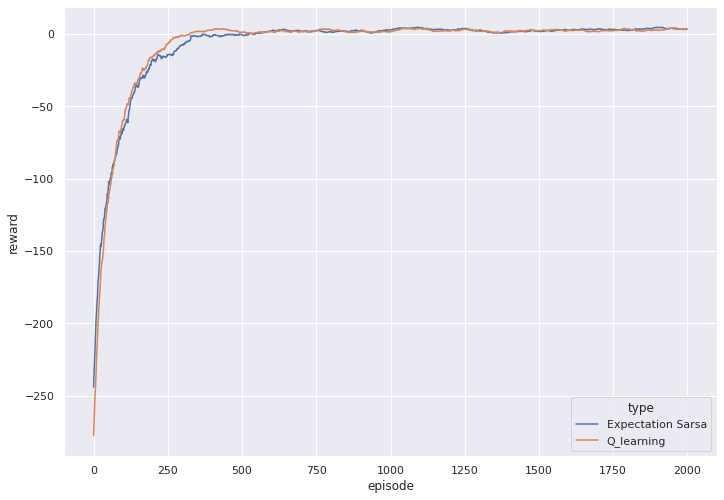

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
data.reset_index(inplace=True)
sns_plot = sns.lineplot(x='episode', y='reward', hue='type',data = data[data.episode<2000])
sns_plot.figure.savefig("/content/gdrive/Shared drives/Introduction to AI/final/visualizations/experiment1.png")

In [11]:
#Who wins more often? Q_learning or Expectation Sarsa?
Q_learning_wins = 0
for i in range(10):
    env = gym.make('Taxi-v3')
    print(f"Environment {i+1}")
    env.render()
    
    agent = Agent(**optimal_Q_learning)
    avg_rewards_Q_learning, best_avg_reward_Q_learning = evaluate(env, agent)

    agent = Agent(**optimal_exp_sarsa)
    avg_rewards_exp_sarsa, best_avg_exp_sarsa = evaluate(env, agent)
    
    if best_avg_reward_Q_learning>best_avg_exp_sarsa: Q_learning_wins += 1

Environment 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 4.79

Episode 20000/20000 || Best average reward 4.99

Environment 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 4.71

Episode 20000/20000 || Best average reward 4.82

Environment 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 5.02

Episode 20000/20000 || Best average reward 4.63

Environment 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 5.01

Episode 20000/20000 || Best average reward 5.02

Environment 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 5.07

Episode 20000/20000 || Best average reward 4.99

Environment 6
+

In [12]:
print(f'Q learning wins in {Q_learning_wins/10*100}% of cases')

Q learning wins in 30.0% of cases


### Experiment2

In [13]:
optimal_Q_learning = {'algorithm': 'Q_learning','alpha': 0.25, 'epsilon_cut': 0.0, 'epsilon_decay': 0.9, 'start_epsilon': 0.99, 'gamma': 0.7}
optimal_exp_sarsa = {'algorithm': 'exp_sarsa', 'alpha': 0.25, 'epsilon_cut': 0.0, 'epsilon_decay': 0.9, 'start_epsilon': 0.99, 'gamma': 0.7}

In [14]:
env = gym.make('Taxi-v3')
agent = Agent(**optimal_Q_learning)
avg_rewards_Q_learning, best_avg_reward_Q_learning = evaluate(env, agent)

agent = Agent(**optimal_exp_sarsa)
avg_rewards_exp_sarsa, best_avg_exp_sarsa = evaluate(env, agent)

Episode 20000/20000 || Best average reward 8.99

Episode 20000/20000 || Best average reward 8.9



In [15]:
data = pd.DataFrame(list(avg_rewards_Q_learning), columns=['reward'])
data.loc[:,'episode'] = range(0,len(list(avg_rewards_Q_learning)))
data.loc[:,'type'] = 'Q_learning'

data1 = pd.DataFrame(list(avg_rewards_exp_sarsa), columns=['reward'])
data1.loc[:,'episode'] = range(0,len(list(avg_rewards_Q_learning)))
data1.loc[:,'type'] = 'Expectation Sarsa'

data = data1.append(data)

In [16]:
data[data.type=='Q_learning'].max()

reward           8.99
episode         19900
type       Q_learning
dtype: object

In [17]:
data[data.type=='Expectation Sarsa'].max()

reward                   8.9
episode                19900
type       Expectation Sarsa
dtype: object

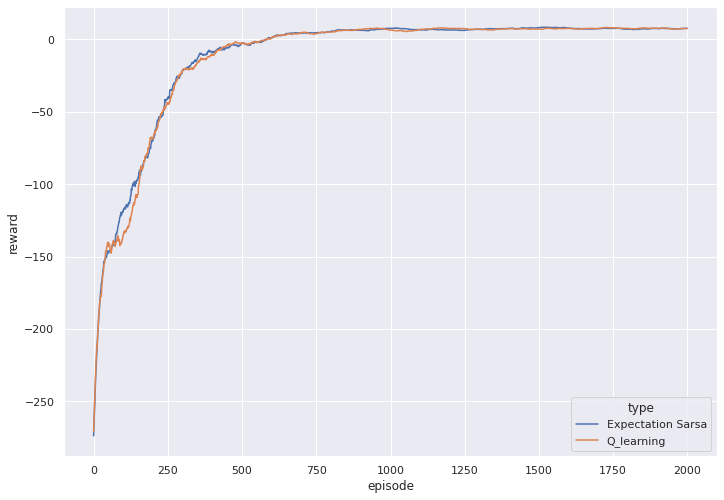

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
data.reset_index(inplace=True)
sns_plot = sns.lineplot(x='episode', y='reward', hue='type',data = data[data.episode<2000])
sns_plot.figure.savefig("/content/gdrive/Shared drives/Introduction to AI/final/visualizations/experiment2.png")

In [19]:
#Who wins more often? Q_learning or Expectation Sarsa?
Q_learning_wins = 0
for i in range(10):
    env = gym.make('Taxi-v3')
    print(f"Environment {i+1}")
    env.render()
    
    agent = Agent(**optimal_Q_learning)
    avg_rewards_Q_learning, best_avg_reward_Q_learning = evaluate(env, agent)

    agent = Agent(**optimal_exp_sarsa)
    avg_rewards_exp_sarsa, best_avg_exp_sarsa = evaluate(env, agent)
    
    if best_avg_reward_Q_learning>best_avg_exp_sarsa: Q_learning_wins += 1

Environment 1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 8.8

Episode 20000/20000 || Best average reward 8.68

Environment 2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 8.79

Episode 20000/20000 || Best average reward 8.8

Environment 3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 8.78

Episode 20000/20000 || Best average reward 8.83

Environment 4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 8.83

Episode 20000/20000 || Best average reward 8.87

Environment 5
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Episode 20000/20000 || Best average reward 8.75

Episode 20000/20000 || Best average reward 8.78

Environment 6
+--

In [20]:
print(f'Q learning wins in {Q_learning_wins/10*100}% of cases')

Q learning wins in 40.0% of cases
